In [287]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [288]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [289]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [290]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [291]:
#Extract the coin_id column from the original DataFrame(from chatgpt)
# coin_ids = market_data_df['coin_id']

# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(market_data_scaled, columns=[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'])

# Copy the crypto names from the original data
# market_data_df['price_change_percentage_24h']=market_data_scaled['price_change_percentage_24h']
# market_data_df['price_change_percentage_7d']=market_data_scaled['price_change_percentage_7d']
# market_data_df['price_change_percentage_14d']=market_data_scaled['price_change_percentage_14d']
# market_data_df['price_change_percentage_30d']=market_data_scaled['price_change_percentage_30d']
# market_data_df['price_change_percentage_60d']=market_data_scaled['price_change_percentage_60d']
# market_data_df['price_change_percentage_200d']=market_data_scaled['price_change_percentage_200d']
# market_data_df['price_change_percentage_1y']=market_data_scaled['price_change_percentage_1y']
## columns_to_assign = ['price_change_percentage_24h', 'price_change_percentage_7d',
##                       'price_change_percentage_14d', 'price_change_percentage_30d',
##                       'price_change_percentage_60d', 'price_change_percentage_200d',
##                       'price_change_percentage_1y']

## market_data_df[columns_to_assign] = market_data_scaled[columns_to_assign]

#Set the coinid column as index
# Step 3: Add the coin_id column back to the scaled DataFrame(from chatgpt)
market_data_scaled['coin_id'] = market_data_df.index

## Step 4: Set the 'coin_id' as the index in the final DataFrame(from chatgpt)
market_data_scaled = market_data_scaled.set_index('coin_id')

###market_data_df=market_data_df.set_index('coin_id')

# Display sample data
###market_data_scaled

## Display the final DataFrame to verify the changes
market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [292]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values=list(range (1,11))


# Create an empty list to store the inertia values
inertia=[]

market_data_scaled.dropna()
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    k_model=KMeans(n_clusters=k, n_init='auto', random_state=1)
    k_model.fit(market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data={
    "k" : k_values,
    "inertia" : inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df=pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


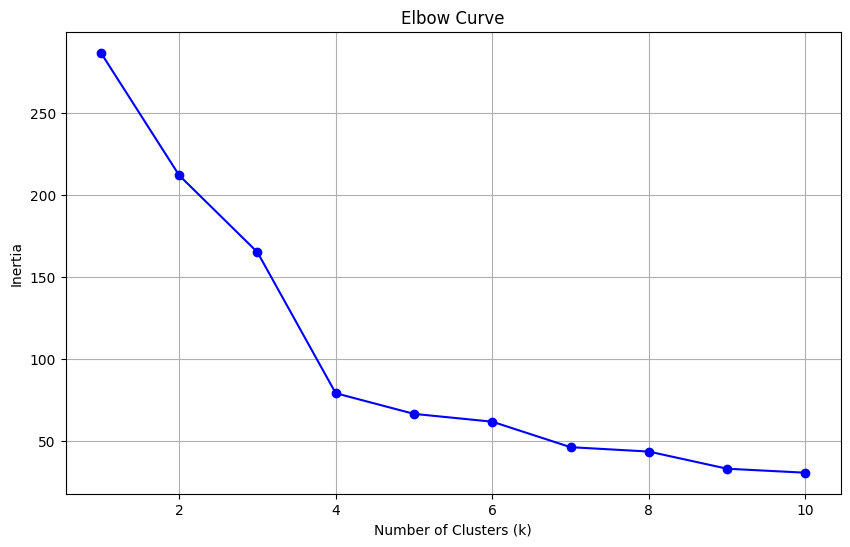

In [293]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [294]:
# Initialize the K-Means model using the best value for k
model =KMeans(n_clusters=4, n_init='auto', random_state=1)

In [295]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [296]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_predictions=model.predict(market_data_scaled)


# View the resulting array of cluster values.
crypto_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [297]:
# Create a copy of the DataFrame
market_data_copy=market_data_scaled.copy()

In [298]:
# Add a new column to the DataFrame with the predicted clusters
market_data_copy['crypto_clusters']=crypto_predictions

# Display sample data
market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

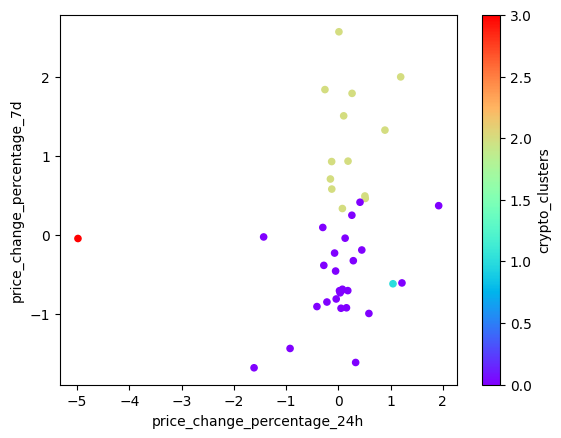

In [299]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", colormap='rainbow', c='crypto_clusters')

### Optimize Clusters with Principal Component Analysis.

In [300]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)



In [301]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data=pca.fit_transform(market_data_scaled)


# View the first five rows of the DataFrame.
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [302]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

In [303]:
pca_data.shape

(41, 3)

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.37, 0.34, 0.17. The total for all three combined is 0.88

In [304]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_data, columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_scaled.index

# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")


# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [305]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values=list(range (1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    k_model=KMeans(n_clusters=k, n_init='auto', random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data={
    "k" : k_values,
    "inertia" : inertia
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df=pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


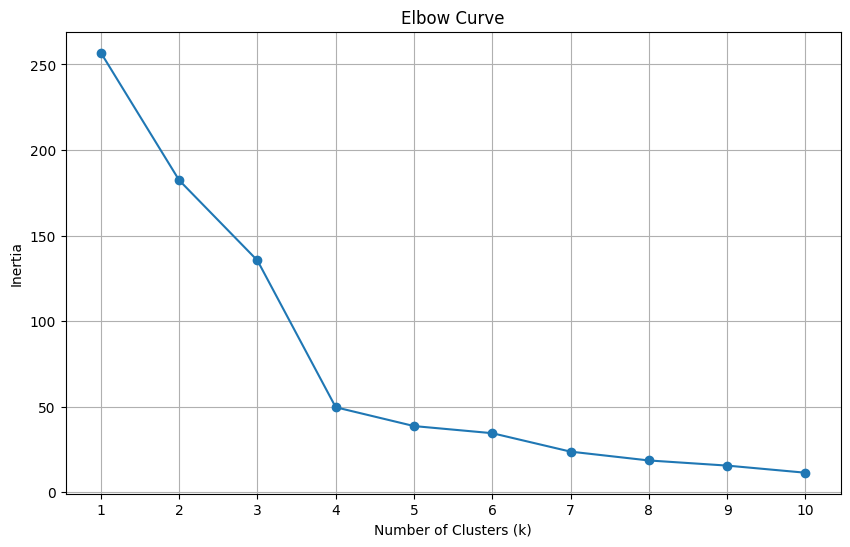

In [306]:
# Plot a line chart with all the inertia values computed with the different
# values of k to visually identify the optimal value for k.
k = elbow_df['k']
inertia = elbow_df['inertia']
plt.figure(figsize=(10, 6))
plt.plot(k, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k)
plt.grid(True)
plt.show()



#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [307]:
# Initialize the K-Means model using the best value for k
model =KMeans(n_clusters=4, n_init='auto', random_state=1)


In [308]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [309]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions=model.predict(pca_df)


# Print the resulting array of cluster values.
pca_predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [310]:
# Create a copy of the DataFrame with the PCA data
pca_copy=pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_copy['crypto_clusters']=pca_predictions


# Display sample data
pca_copy.head()


,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [311]:
import hvplot.pandas



In [312]:
print(pca_copy.columns)


Index(['PCA1', 'PCA2', 'PCA3', 'crypto_clusters'], dtype='object')


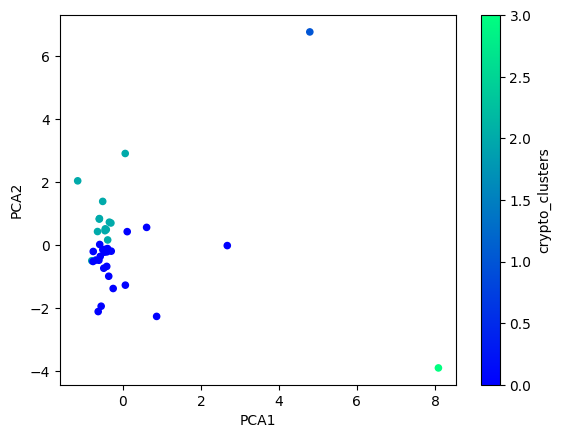

In [317]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`
pca_copy.plot.scatter(x="PCA1", y="PCA2", c="crypto_clusters", colormap='winter')

# Display the plot
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [327]:
# Use the columns from the original scaled DataFrame as the index.

# Setting multiple columns as the index
market_data_scaled.set_index

# Display the DataFrame
market_data_scaled.head()




,,,,,,
price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    